In [16]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("myopia.csv")
target = df.MYOPIC
df.drop(columns=["MYOPIC"], inplace=True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


/Users/japhetmwamba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


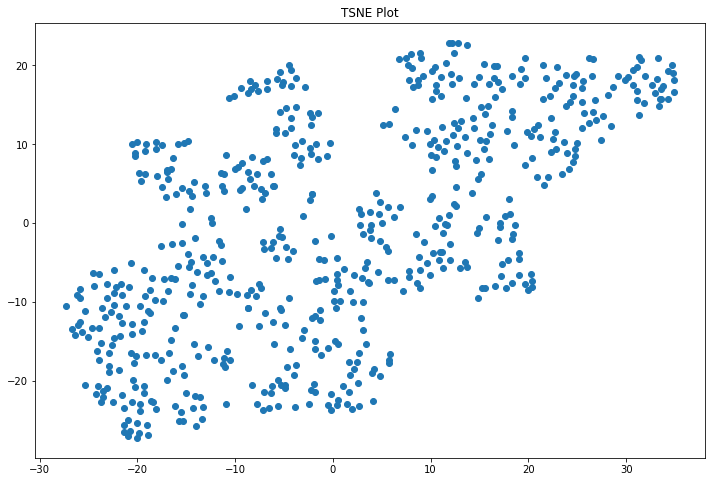

In [19]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

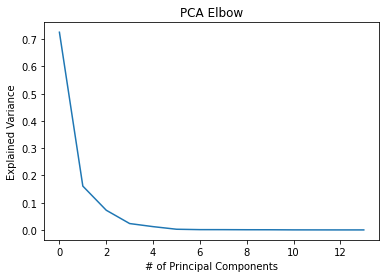

In [20]:
# Initialize PCA model
pca = PCA()
pca.fit(df)

plt.plot(range(len(df.columns)), pca.explained_variance_ratio_)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Elbow")
plt.show()

In [21]:
list(zip(range(len(df.columns)), pca.explained_variance_ratio_))

[(0, 0.7255724892053265),
 (1, 0.16081428120782754),
 (2, 0.07227215489674389),
 (3, 0.02333858889043094),
 (4, 0.012045721818095921),
 (5, 0.002483938344980192),
 (6, 0.0010474125750545703),
 (7, 0.000963275380648177),
 (8, 0.0006603799884485654),
 (9, 0.0005714584698331089),
 (10, 0.00016195402559981615),
 (11, 6.833523602788601e-05),
 (12, 9.96098286008013e-09),
 (13, 2.4540296555961435e-33)]

In [22]:
df.corr()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
AGE,1.000000,-0.118255,0.220784,0.191849,-0.185531,0.202472,0.057538,0.130194,0.056929,0.399324,0.069395,0.286820,-0.039515,-0.055427
SPHEQ,-0.118255,1.000000,-0.305512,-0.238784,0.072699,-0.247130,-0.022468,-0.099501,-0.031088,-0.054873,-0.080934,-0.120611,-0.131860,-0.140113
AL,0.220784,-0.305512,1.000000,0.456296,-0.328939,0.941916,0.112004,0.017944,0.086328,0.098326,0.077170,0.111527,0.046948,-0.010278
ACD,0.191849,-0.238784,0.456296,1.000000,-0.339291,0.199447,0.075161,0.011481,0.071666,0.051826,-0.042761,0.040157,0.115974,0.053746
LT,-0.185531,0.072699,-0.328939,-0.339291,1.000000,-0.451594,-0.032745,0.018481,-0.025345,-0.037580,0.049095,0.002875,-0.011127,-0.015586
VCD,0.202472,-0.247130,0.941916,0.199447,-0.451594,1.000000,0.096235,0.010120,0.069369,0.091759,0.082579,0.099774,0.009987,-0.025398
SPORTHR,0.057538,-0.022468,0.112004,0.075161,-0.032745,0.096235,1.000000,0.131597,0.010185,0.115844,0.173470,0.189365,-0.065167,0.002623
READHR,0.130194,-0.099501,0.017944,0.011481,0.018481,0.010120,0.131597,1.000000,0.035300,0.262374,0.003092,0.697522,-0.040312,0.010341
COMPHR,0.056929,-0.031088,0.086328,0.071666,-0.025345,0.069369,0.010185,0.035300,1.000000,0.114161,0.129655,0.495171,0.036116,0.023954
STUDYHR,0.399324,-0.054873,0.098326,0.051826,-0.037580,0.091759,0.115844,0.262374,0.114161,1.000000,0.042798,0.624156,-0.040136,-0.008783


In [23]:
pca = PCA(n_components=3)
pca.fit(df)

components = pd.DataFrame(pca.transform(df), columns=["PCA1", "PCA2", "PCA3"])

components.head()

,PCA1,PCA2,PCA3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


/Users/japhetmwamba/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


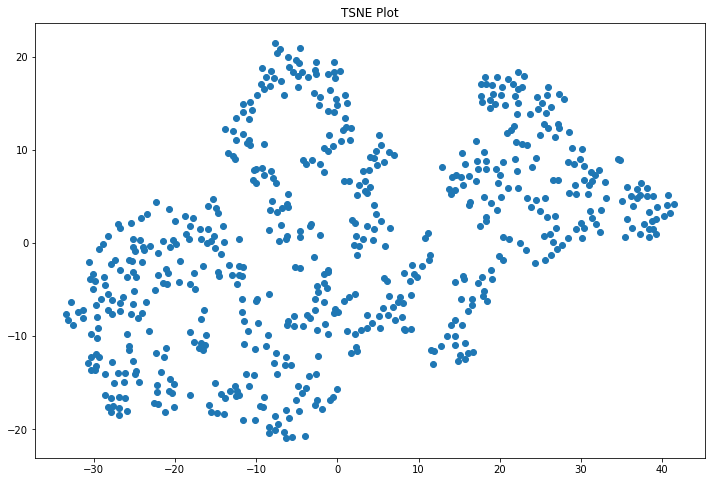

In [24]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(components)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

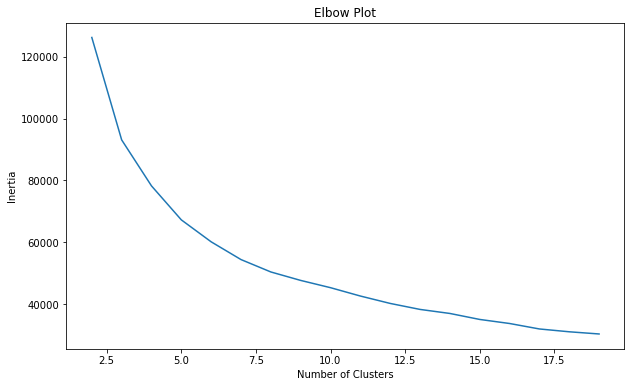

In [25]:
inertia = []
k_range = list(range(2, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

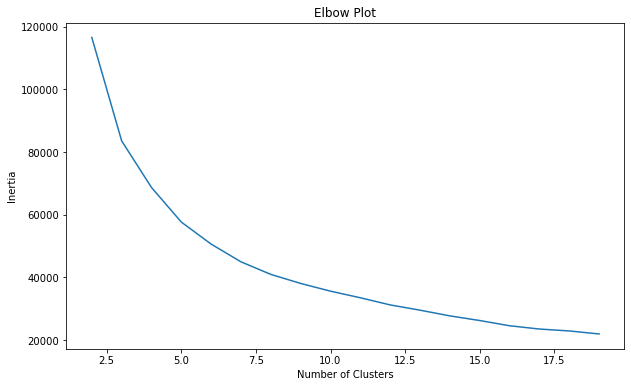

In [26]:
inertia = []
k_range = list(range(2, 20))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(components)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

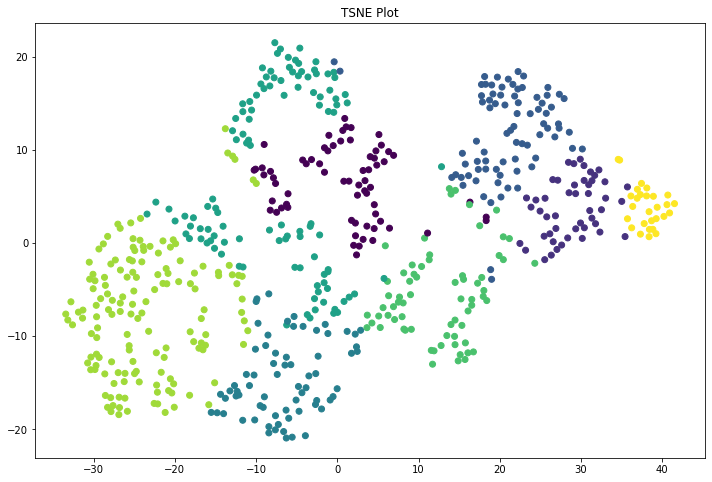

In [27]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

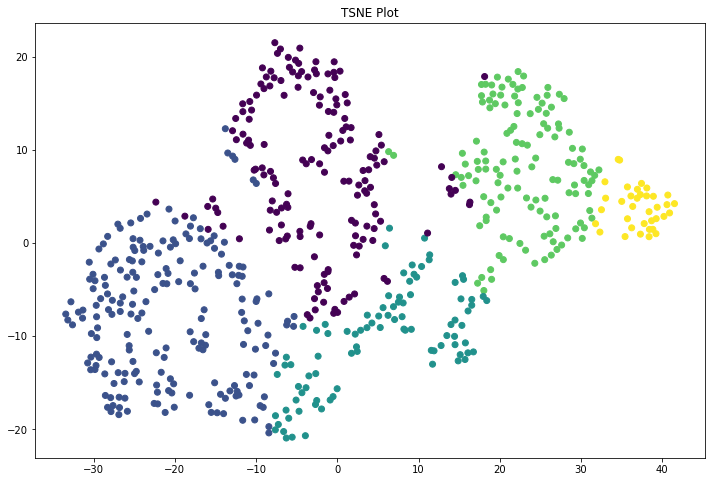

In [28]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

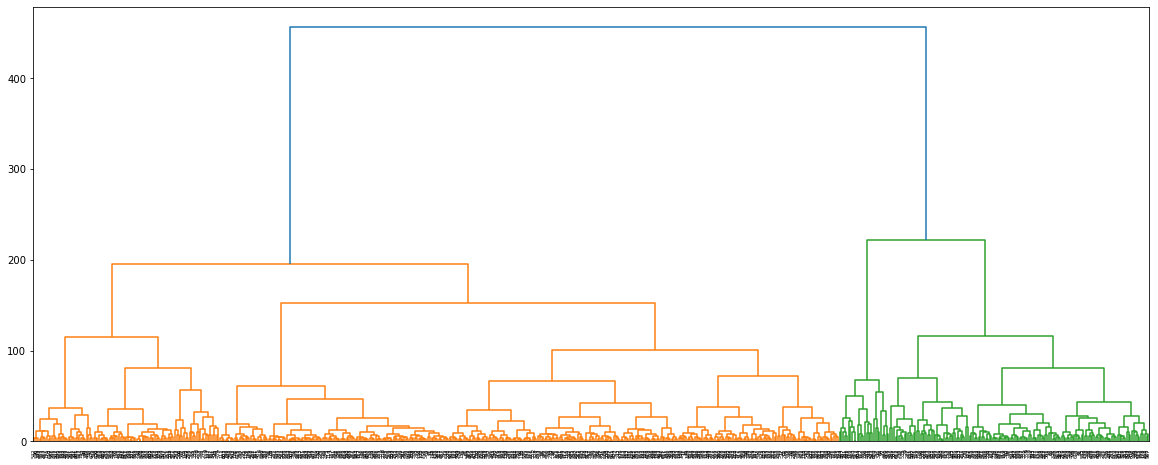

In [29]:
mergings = linkage(df, method="ward")

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

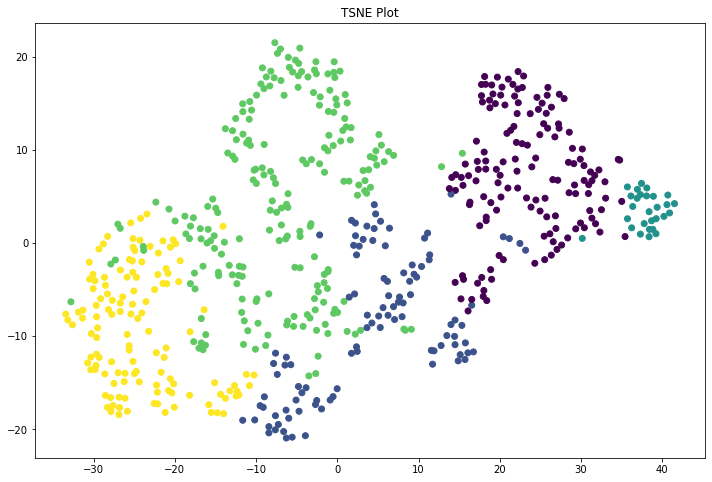

In [31]:
cluster = AgglomerativeClustering(
    n_clusters=5,
    affinity="euclidean",
    linkage="ward"
)

preds = cluster.fit_predict(df)
plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()